In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

columns=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] 
wine_dataset=pd.read_csv(url, names=columns)
wine_dataset.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
y = wine_dataset['Class']
X = wine_dataset.drop(columns=['Class'])

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
pca.components_
pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

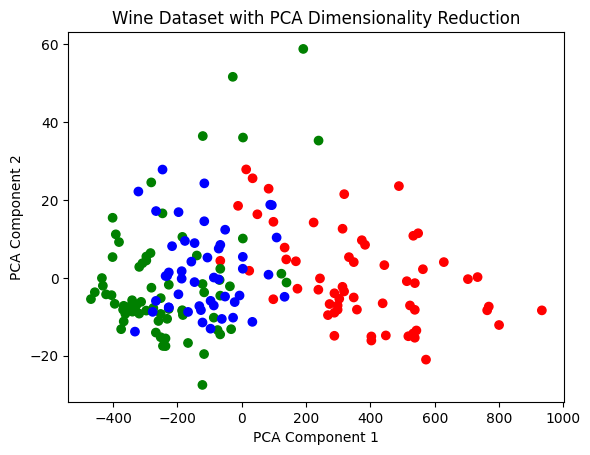

In [5]:
colors = ['red','green','blue']
classes = pd.Categorical(y).codes 

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=classes, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Wine Dataset with PCA Dimensionality Reduction')
plt.show()

In [6]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

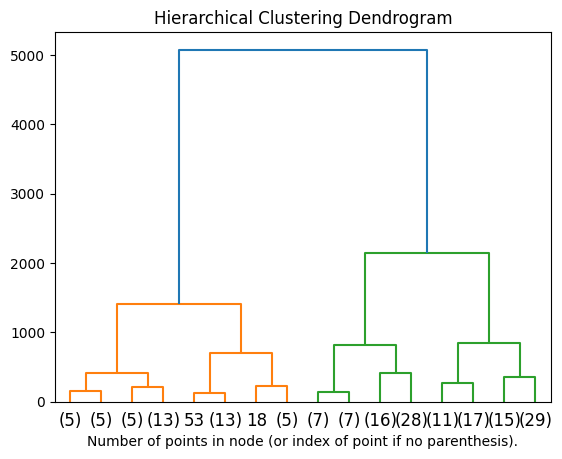

In [7]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [8]:
from scipy.special import comb
from itertools import combinations

def check_clusterings(labels_true, labels_pred):
    """Check that the two clusterings matching 1D integer arrays."""
    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)    
    # input checks
    if labels_true.ndim != 1:
        raise ValueError(
            "labels_true must be 1D: shape is %r" % (labels_true.shape,))
    if labels_pred.ndim != 1:
        raise ValueError(
            "labels_pred must be 1D: shape is %r" % (labels_pred.shape,))
    if labels_true.shape != labels_pred.shape:
        raise ValueError(
            "labels_true and labels_pred must have same size, got %d and %d"
            % (labels_true.shape[0], labels_pred.shape[0]))
    return labels_true, labels_pred

def rand_score (labels_true, labels_pred):
    """given the true and predicted labels, it will return the Rand Index."""
    check_clusterings(labels_true, labels_pred)
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

In [10]:
k = 3  
result = KMeans(n_clusters=k, random_state=42).fit_predict(X)
print(rand_score(y, result))

result = KMeans(n_clusters=k, random_state=42).fit_predict(X_reduced)
print(rand_score(y, result))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.718656763791024


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.718656763791024


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [12]:
scores = []

In [13]:
lrc = LogisticRegression() 
lrc.fit(X_train, y_train)
scores.append(lrc.score(X_test, y_test))
lrc.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166666666666666

In [14]:
tree = DecisionTreeClassifier(criterion='gini', random_state=10)
tree.fit(X_train, y_train)
scores.append(tree.score(X_test, y_test))
print(tree.score(X_test, y_test))

0.9444444444444444

In [15]:
svc = SVC(kernel="linear", C=0.025)
svc.fit(X_train, y_train)
scores.append(svc.score(X_test, y_test))
print(svc.score(X_test, y_test))

0.9444444444444444

In [102]:
d={}
for depth in range (1,10):
  accuracy = 0
  rfc = RandomForestClassifier(max_depth=depth, n_estimators=10, max_features=1)
  rfc.fit(X_train, y_train)
  accuracy += rfc.score(X_test, y_test)
 
  if "accuracy" in d.keys():
    d["accuracy"].append(accuracy)
  else:
    d["accuracy"] = [accuracy]

rfc_results = pd.DataFrame(data=d)
rfc_results

,accuracy
0,0.888889
1,0.888889
2,0.861111
3,0.972222
4,0.861111
5,0.916667
6,0.861111
7,0.916667
8,0.861111


In [32]:
rfc = RandomForestClassifier(max_depth=4, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
scores.append(rfc.score(X_test, y_test))
print(rfc.score(X_test, y_test))

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        18
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [95]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores.append(gnb.score(X_test, y_test))
print(gnb.score(X_test, y_test))

0.8888888888888888

In [96]:
d={}
for metric in ["euclidean","manhattan","cosine"]:
    for neighbors in range (1,10):
        accuracy = 0
        knn = KNeighborsClassifier(n_neighbors=neighbors,metric=metric)
        knn.fit(X_train, y_train)
        accuracy += knn.score(X_test, y_test)

        if metric in d.keys():
            d[metric].append(accuracy)
        else:
            d[metric] = [accuracy]
    
knn_results = pd.DataFrame(data=d)
knn_results

,euclidean,manhattan,cosine
0,0.694444,0.833333,0.777778
1,0.611111,0.694444,0.805556
2,0.694444,0.722222,0.833333
3,0.750000,0.750000,0.777778
4,0.722222,0.777778,0.777778
5,0.722222,0.833333,0.805556
6,0.694444,0.722222,0.777778
7,0.694444,0.777778,0.722222
8,0.666667,0.750000,0.805556


In [34]:
knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn.fit(X_train, y_train)
scores.append(knn.score(X_test, y_test))
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

0.8333333333333334
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.88      0.83      0.86        18
           3       0.75      0.75      0.75         8

    accuracy                           0.83        36
   macro avg       0.82      0.83      0.82        36
weighted avg       0.84      0.83      0.83        36



In [114]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
print(scores.append(mlp.score(X_test, y_test)))
mlp.score(X_test, y_test)

0.9166666666666666

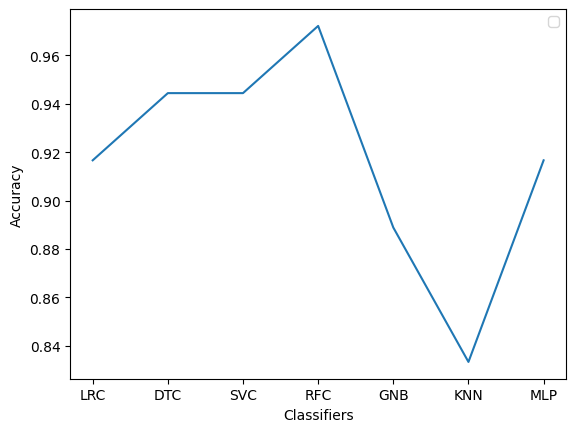

In [99]:
classifiers = ['LRC', 'DTC', 'SVC', 'RFC', 'GNB', 'KNN', 'MLP']

plt.plot(classifiers, scores)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()